### Ссылки

- https://habr.com/ru/company/ods/blog/328372/ 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
- https://dyakonov.org/2021/05/27/imbalance/
- https://loginom.ru/blog/imbalance-class
- https://imbalanced-learn.org/stable/user_guide.html#user-guide
- https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0192-5
- https://www.osp.ru/os/2017/02/13052223
- https://towardsdatascience.com/protecting-your-money-detecting-credit-card-fraud-with-ml-dl-2c4a9b9a0779

- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount

### Загрузка библиотек 

    !pip install imblearn

In [1]:
import pandas as pd 
import numpy as np

import itertools

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours


In [3]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression


### Загрузка датасета

In [4]:
data = datasets.load_breast_cancer()
 
    
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

classifier = LogisticRegression(random_state=42, solver='lbfgs', max_iter=10000)
classifier_w = LogisticRegression(class_weight='balanced', random_state=42, solver='lbfgs', max_iter=10000)


In [6]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.fit_transform(X_test.values), columns=X_train.columns)

### Метрики

Метрики и данные с несбалансированными классами

- **Accuracy** и **Error rate** являются наиболее часто используемыми показателями при оценке результатов классификации. Однако при работе с классовым дисбалансом и того, и другого недостаточно, поскольку в результирующем значении доминирует группа большинства.


- **Precision** измеряет процент положительно помеченных образцов, которые на самом деле являются положительными. Precision чувствительна к дисбалансу классов, поскольку она учитывает количество отрицательных выборок, неправильно помеченных как положительные. Однако одной точности недостаточно, поскольку она не дает представления о количестве образцов из положительной группы, которые были ошибочно помечены как отрицательные. 


- **Recall** или **True Positive Rate (TPR)**, измеряет процент положительной группы, которая была правильно предсказана моделью как положительная. Recall не зависит от дисбаланса, потому что он зависит только от позитивной группы. Recall не учитывает количество отрицательных выборок, которые ошибочно классифицированы как положительные, что может быть проблематично в задачах, содержащих несбалансированные по классам данные со многими отрицательными выборками. 


- **Selectivity** или **True Negative Rate (TNR)**, измеряет процент отрицательной группы, которая была правильно предсказана как отрицательная. **F-Measure** или **F1-score**, сочетает в себе точность и отзыв, используя среднее гармоническое значение, где коэффициент β используется для настройки относительной важности точности по сравнению с отзывом. **G-Mean** измеряет производительность путем объединения показателей TPR и TNR с использованием квадратного корня из их произведения. 


- **G-Mean**, **Balanced Accuracy** метрика также объединяет значения TPR и TNR для вычисления метрики, которая более чувствительна к группе меньшинств. Хотя F-мера, G-Mean, Balanced Accuracy являются улучшениями по сравнению с точностью и частотой ошибок, они все еще не совсем эффективны при сравнении производительности между классификаторами и различными распределениями 


- **Receiver operating characteristics (ROC) curve** отображает истинную положительную частоту по сравнению с ложноположительной частотой, создавая визуализацию, которая отображает компромисс между правильно классифицированными положительными образцами и неправильно классифицированными отрицательными образцами. Для моделей, которые создают непрерывные вероятности, пороговое значение может быть использовано для создания ряда точек вдоль пространства ROC. Исходя из этого, можно вычислить единую сводную метрику - площадь под кривой ROC (AUC) , которая часто используется для сравнения производительности между моделями. 


- Однако кривые ROC могут давать чрезмерно оптимистичные результаты при сильно искаженных наборах данных, и вместо этого следует использовать **Precision–Recall (PR) curves**. Авторы утверждают, что кривая может доминировать в пространстве ROC только в том случае, если она также доминирует в пространстве PR. Это оправдано тем фактом, что ложноположительный показатель, используемый ROC, FPR = FP/(FP+TN) , будет менее чувствителен к изменениям в FP по мере роста размера отрицательного класса. 


- **Статистика Каппа Коэна** выражает уровень согласия между двумя классами, принимает значение от -1 до 1. Максимальное значение означает полное согласие; ноль или меньше означает случайное согласие.  

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html

https://en.wikipedia.org/wiki/Cohen%27s_kappa


- **Коэффициент Мэттьюса** учитывает истинные и ложные положительные и отрицательные результаты и обычно рассматривается как сбалансированная мера,которая может быть использована даже в том случае,если классы имеют очень разные размеры. По сути это коэффициент корреляции между -1 и +1, где +1 представляет собой идеальное предсказание,0-среднее случайное предсказание и -1-обратное предсказание.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html


### Методы

Методы для работы с несбалансированными классами

- Воспользоваться встроенной функцию весов class_weight=’balanced’ 


- Подобрать оптимальный порог. Обычно модель получает некоторые оценки принадлежности к классам, а сама классификация – это результат бинаризации (по умолчанию порог = 0.5) 


- - - - 

- **Random Oversampling** – стратегия пересэмплирования, при которой рандомно дублируются объекты класса меньшинства.


- **Synthetic Minority Oversampling Techniques (SMOTE)** – стратегия пересэмплирования, при которой происходит увеличение класса меньшинства за счёт представителей выпуклых комбинаций пар. В методе SMOTE для точки малого класса выбирается один из k ближайших соседей и на отрезке между ними случайно выбирается новый объект.


- **Borderline SMOTE** – https://sci2s.ugr.es/keel/pdf/specific/congreso/han_borderline_smote.pdf 


- **Adaptive Synthetic (ADASYN)** – метод аналогичен SMOTE, но число объектов, которые генерируются с помощью объекта класса меньшинства, пропорционально числу чужаков (объектов класса большинства) в его окрестности.

- - - 

- **Random Undersampling** – стратегия недосэмплирования, при которой верется случайная подвыборка. 


- **NearMiss1** – стратегия, при которой из класса большинства выбираются объекты, у которых среднее расстояний до N ближайших малого класса наименьшее, т.е. из граничной зоны.


- **NearMiss2** – стратегия, при которой из большего класса выбираются объекты, у которых среднее расстояний до N дальних малого класса наименьшее.


- **TomekLinks** – стратегия, при которой удаляются объекты класса большинства, образующие связи Томека (объекты двух разных классов образуют связь Томека, если нет объекта, который ближе к одному из них при этом являясь объектом другого класса) (не гарантируется выравнивание классов по мощности)


- **ENNs** – скользящий контроль, например по 10 фолдам, при котором удаляются объекты класса большинства, на которых ближайший сосед ошибается (не гарантируется выравнивание классов по мощности) 

### Функции

#### Confusion matrix

In [7]:
def plot_confusion_matrix(classifier, 
                          classes=['0', '1'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, 
                          X_test=X_test, 
                          y_test=y_test):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plt.figure(figsize=(5, 4))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    font = {'size' : 8}

    plt.rc('font', **font)
    plt.show()

#### ROC curve 

In [8]:
def plot_roc_curve(classifiers):
    
    plt.figure(figsize=(5, 4))

    for i in classifiers.keys():
        fpr, tpr, thresholds = roc_curve(y_test, classifiers[i].predict_proba(X_test)[:,1], pos_label=1)
        plt.plot(fpr, tpr, label= i)

    plt.legend(fontsize=8)
    plt.plot([0, 1], [0, 1])
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
#     plt.savefig("ROC.png")
    plt.show()


#### Precision-Recall

In [9]:
def plot_precision_recall(classifiers, X_test=X_test, y_test=y_test):
    
    _, ax = plt.subplots(figsize=(5, 4))

    for i in classifiers:
        y_score = classifiers[i].decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_score)
#         average_precision = average_precision_score(y_test, y_score)

        display = PrecisionRecallDisplay(
            recall=recall,
            precision=precision, 
#             average_precision=average_precision, 
        )
        display.plot(ax=ax, name=i)

    _ = display.ax_.set_title("2-class Precision-Recall curve")


#### Подбор порога

In [10]:
def investigate_model(classifier, X_train=X_train, y_train=y_train, cv=10, X_test=X_test, y_test=y_test):

    df = pd.DataFrame(index=['train0', 'test0', 'train', 'test', 'theta'])
    
    scores0 = [recall_score, precision_score] 
    scores1 = [accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score, matthews_corrcoef]
    scores2 = [log_loss, roc_auc_score, average_precision_score]
    
    X_train_cv = cross_val_predict(classifier, X_train, y_train, cv=cv, method='predict_proba')[:,1]
    
    X_train_prob = classifier.predict_proba(X_train)[:,1]
    X_train_pred = classifier.predict(X_train)
    
    X_test_prob = classifier.predict_proba(X_test)[:,1]
    X_test_pred = classifier.predict(X_test)
    
    # найдем порог
    thetas = np.linspace(0, 1, 101)
    
    average = 'macro'
    
    for score in scores0:
        score_list = np.array([score(y_train, X_train_prob > theta, average=average, zero_division=0) for theta in thetas])
        i = np.argmax(score_list)
        df[score.__name__] = [score(y_test, X_test_pred, average=average, zero_division=0), 
                              score(y_test, X_test_pred, average=average, zero_division=0), 
                              score_list[i], 
                              score(y_test, X_test_prob > thetas[i], average=average, zero_division=0), 
                              thetas[i]]
        
    for score in scores1:
        score_list = np.array([score(y_train, X_train_prob > theta) for theta in thetas])
        i = np.argmax(score_list)
        df[score.__name__] = [score(y_test, X_test_pred), 
                              score(y_test, X_test_pred), 
                              score_list[i], 
                              score(y_test, X_test_prob > thetas[i]), 
                              thetas[i]]

    for score in scores2:
        df[score.__name__] = [score(y_train, X_train_prob), 
                              score(y_test, X_test_prob), 
                              score(y_train, X_train_cv),
                              score(y_test, X_test_prob), 
                              np.nan]
    return df


#### Статистика

In [11]:
def make_statistics(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):

    df = pd.DataFrame(index=['train', 'test'])
    
    X_train_prob = classifier.predict_proba(X_train)[:, 1]
    X_train_pred = classifier.predict(X_train)
    
    X_test_prob = classifier.predict_proba(X_test)[:, 1]
    X_test_pred = classifier.predict(X_test)
    
    scores0 = [recall_score, precision_score] 
    scores1 = [accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score, matthews_corrcoef]
    scores2 = [log_loss, roc_auc_score, average_precision_score] 
    
    average = 'macro'
    
    for score in scores0:
        df[score.__name__] = [score(y_train, X_train_pred, average=average, zero_division=0), 
                              score(y_test, X_test_pred, average=average, zero_division=0)]
    
    for score in scores1:
        df[score.__name__] = [score(y_train, X_train_pred), 
                              score(y_test, X_test_pred)]
        
    for score in scores2:
        df[score.__name__] = [score(y_train, X_train_prob), 
                              score(y_test, X_test_prob)]
    
    return df


#### Итоговая таблица

In [12]:
def report(X_train, y_train, X_test, y_test, classifier, classifier_w=None, random_state=55): 
    
    keys = ['Base', 'Base+ threshold', 
            'RandomOS', 'Borderline SMOTE', 'SMOTE', 'ADASYN', 
            'RandomUS', 'NearMiss1', 'NearMiss2', 'TomekLinks', 'ENNs']

    classifiers = {}
    
    print('----------------- DataSet -----------------\n')
    print(f'X train shape: {X_train.shape[0]}       y train mean: {y_train.mean():.2f}')
    print(f'X test shape: {X_test.shape[0]}        y test mean: {y_test.mean():.2f}')

    dfs = [] # итоговая таблица

    classifier.fit(X_train, y_train)
    
    # Датасет
    dfs.append(make_statistics(classifier))
    classifiers['Base'] = classifier
    
    # Датасет + порог 
    dfs.append(investigate_model(classifier))
    classifiers['Base_threshold'] = classifier
    
    if classifier_w: 
        
        classifier_w.fit(X_train, y_train)
        
        keys = ['Base', 'Base+ threshold', 'Weights', 'Weights+ threshold',
                'RandomOS', 'Borderline SMOTE', 'SMOTE', 'ADASYN', 
                'RandomUS', 'NearMiss1', 'NearMiss2', 'TomekLinks', 'ENNs']

        # Датасет с параметром "баланс классов" 
        dfs.append(make_statistics(classifier_w))
        classifiers['Balanced'] = classifier    
        
        # Датасет с параметром "баланс классов" + порог 
        dfs.append(investigate_model(classifier_w))
        classifiers['Balanced_threshold'] = classifier

    
    print('\n\n----------- Oversampling methods -----------')
    techniques = [RandomOverSampler(random_state=random_state),
                  BorderlineSMOTE(k_neighbors=10, random_state=random_state),
                  SMOTE(random_state=random_state),
                  ADASYN(random_state=random_state)]

    for sampler in techniques:
        technique = sampler.__class__.__name__
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        classifier.fit(X_resampled, y_resampled)
        dfs.append(make_statistics(classifier, X_train=X_resampled, y_train=y_resampled))
        classifiers[sampler.__class__.__name__] = classifier
        print(f'\nTechnique: {technique}')
        print(f'X train shape: {X_resampled.shape[0]}       y train mean: {y_resampled.mean():.2f} \n')


    print('\n\n----------- Undersampling methods -----------')
    techniques = [RandomUnderSampler(random_state=random_state),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  TomekLinks(),
                  EditedNearestNeighbours()]

    for sampler in techniques:
        technique = sampler.__class__.__name__
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        classifier.fit(X_resampled, y_resampled)
        dfs.append(make_statistics(classifier, X_train=X_resampled, y_train=y_resampled))
        classifiers[sampler.__class__.__name__] = classifier
        print(f'\nTechnique: {technique}')
        print(f'X train shape: {X_resampled.shape[0]}       y train mean: {y_resampled.mean():.2f} \n')
    
    
    d = pd.concat([d.T['test'] for d in dfs], keys=keys, axis=1)
    d.loc['log_loss',:] = -d.loc['log_loss',:]
    d = d.rename(index={'log_loss':'$-$log_loss'})
#     d.insert(3, 'theta1', dfs[2].T['theta'].round(3))
#     d.insert(5, 'theta2', dfs[3].T['theta'].round(3))
    
    d = d.style.format(precision=6).highlight_max(axis=1, color='#FFDDDD')
    
    return classifiers, d

### Main

In [13]:
classifiers, _ = report(X_train, y_train, X_test, y_test, classifier, classifier_w=classifier_w)
_

----------------- DataSet -----------------

X train shape: 381       y train mean: 0.63
X test shape: 188        y test mean: 0.63


----------- Oversampling methods -----------

Technique: RandomOverSampler
X train shape: 478       y train mean: 0.50 


Technique: BorderlineSMOTE
X train shape: 478       y train mean: 0.50 


Technique: SMOTE
X train shape: 478       y train mean: 0.50 


Technique: ADASYN
X train shape: 473       y train mean: 0.51 



----------- Undersampling methods -----------

Technique: RandomUnderSampler
X train shape: 284       y train mean: 0.50 


Technique: NearMiss
X train shape: 284       y train mean: 0.50 


Technique: NearMiss
X train shape: 284       y train mean: 0.50 


Technique: TomekLinks
X train shape: 373       y train mean: 0.62 


Technique: EditedNearestNeighbours
X train shape: 351       y train mean: 0.60 



,Base,Base+ threshold,Weights,Weights+ threshold,RandomOS,Borderline SMOTE,SMOTE,ADASYN,RandomUS,NearMiss1,NearMiss2,TomekLinks,ENNs
recall_score,0.934383,0.934383,0.948668,0.934383,0.923002,0.938862,0.941525,0.961622,0.930145,0.934383,0.934383,0.948668,0.930387
precision_score,0.952117,0.956221,0.960258,0.964567,0.940272,0.936379,0.956160,0.959010,0.944403,0.952117,0.952117,0.960258,0.923466
accuracy_score,0.946809,0.946809,0.957447,0.946809,0.936170,0.941489,0.952128,0.962766,0.941489,0.946809,0.946809,0.957447,0.930851
balanced_accuracy_score,0.934383,0.934383,0.948668,0.934383,0.923002,0.938862,0.941525,0.961622,0.930145,0.934383,0.934383,0.948668,0.930387
cohen_kappa_score,0.884179,0.883490,0.907888,0.884179,0.861015,0.875181,0.896069,0.920570,0.872973,0.884179,0.884179,0.907888,0.853337
f1_score,0.958678,0.959016,0.966667,0.959016,0.950413,0.953191,0.962656,0.970213,0.954357,0.958678,0.958678,0.966667,0.944206
matthews_corrcoef,0.886322,0.887353,0.908853,0.886322,0.863102,0.875237,0.897566,0.920629,0.874432,0.886322,0.886322,0.908853,0.853826
$-$log_loss,-0.119440,-0.119440,-0.111800,-0.111800,-0.116631,-0.150871,-0.123161,-0.113707,-0.119567,-0.119063,-0.117596,-0.117363,-0.149864
roc_auc_score,0.988136,0.988136,0.989467,0.989467,0.990436,0.983535,0.986683,0.991283,0.987893,0.987893,0.988257,0.988015,0.986804
average_precision_score,0.991672,0.991672,0.992955,0.992955,0.994090,0.986468,0.990162,0.994446,0.991950,0.991536,0.991868,0.991597,0.991674


Confusion matrix, without normalization
[[ 65   5]
 [  8 110]]


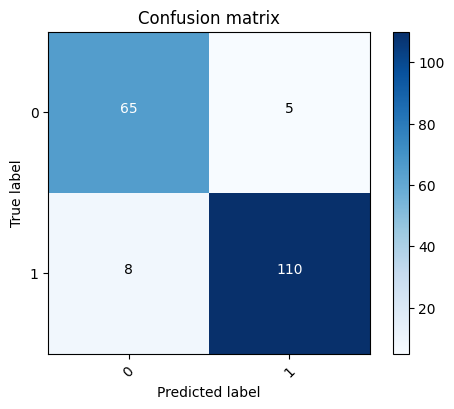

In [14]:
plot_confusion_matrix(classifiers['Base'])

Confusion matrix, without normalization
[[ 65   5]
 [  8 110]]


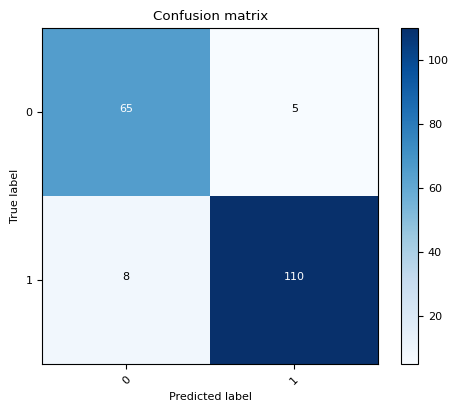

In [15]:
plot_confusion_matrix(classifiers['ADASYN'])

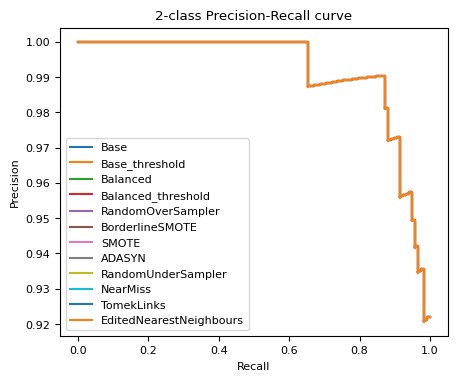

In [16]:
plot_precision_recall(classifiers)

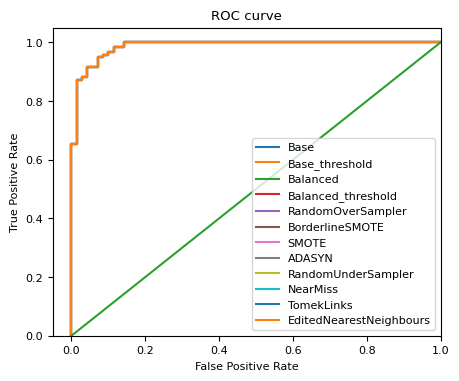

In [17]:
plot_roc_curve(classifiers)